<a href="https://colab.research.google.com/github/abprima/Recommendation_System/blob/main/23_Recommendation_System_Material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recommendation System** (Level - Introduction)

A recommendation system is a technology that provides personalized recommendations to users for items or content they may be interested in. It is designed to help users discover relevant items or information based on their preferences, behavior, and historical data.

Recommendation systems are widely used in various industries and applications, including e-commerce platforms, streaming services, social media platforms, news websites, and more. The goal of a recommendation system is to enhance user experience, increase engagement, and assist users in finding items of interest in a personalized and efficient manner.

<img src="https://miro.medium.com/v2/resize:fit:732/1*O0Yw5NAmnMGxcYkEXZ-L5Q.jpeg" width="600">

### ***Content-Based Filtering***

This approach recommends items based on the characteristics or features of the items themselves. It analyzes the attributes, metadata, or content of the items to find similarities and make recommendations that align with users' preferences.

In this case there will be less diversity in the recommendations, but this will work either the user rates things or not. If we compare this to the example above, maybe user B potentially likes dark comedy but he/she will never know, unless he/she decides to give it a try autonomously, because this filter will only keep recommending dystopian movies or similar. Of course there are many categories we can calculate the similarity on: in the case of movies we can decide to build our own recommender system based on genre only, or maybe we want to include director, main actors and so on.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*BME1JjIlBEAI9BV5pOO5Mg.png" width="300" align="left">






*   Example: Recommend Movies Based on Similiar Genre



In [1]:
# Import Library
import numpy as np
import pandas as pd
import re

In [2]:
# Upload Dataset via Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Calling dataset
dataset_raw = pd.read_csv('/content/drive/MyDrive/movies.csv')
dataset_raw.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Separates each genres into each rows
dataset_raw_genres_separation = dataset_raw.assign(genres = dataset_raw.genres.str.split('|')).explode('genres')
new_dataset = dataset_raw_genres_separation[['title', 'genres']]
new_dataset.head()

,title,genres
0,Toy Story (1995),Adventure
0,Toy Story (1995),Animation
0,Toy Story (1995),Children
0,Toy Story (1995),Comedy
0,Toy Story (1995),Fantasy


In [5]:
# Count the occurrences of each value in the 'Title' column
count_values = new_dataset['genres'].value_counts()
count_values

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: genres, dtype: int64

In [6]:
# Delete (no genres listed) from new_dataset['mov_genres']
new_dataset_1 = new_dataset[new_dataset['genres'] != "(no genres listed)"]

# Recount again
len(new_dataset_1[new_dataset_1.genres == '(no genres listed)'])

0

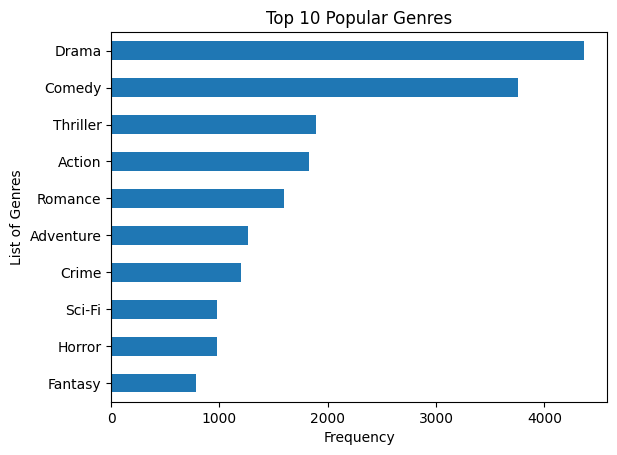

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of subindices
count_values = pd.Series(new_dataset_1['genres']).value_counts()

# Select the top 10 subindices in ascending order
top_10 = count_values.head(10).sort_values()

# Plot the histogram as vertical bars
top_10.plot.barh()

# Set labels and title
plt.xlabel('Frequency')
plt.ylabel('List of Genres')
plt.title('Top 10 Popular Genres')

# Display the plot
plt.show()

In [8]:
# Create new columns for movie title and year
movie_titles = []
years = []

# Iterate through each item in the list
for item in new_dataset_1['title']:
    # Use regular expression to find the year pattern within parentheses
    year_match = re.search(r'\((\d{4})\)', item)
    # Extract the movie title and year
    if year_match:
        movie_title = item[:year_match.start()].strip()
        year = year_match.group(1)
    else:
        movie_title = item
        year = ""

    # Append the movie title and year to respective lists
    movie_titles.append(movie_title)
    years.append(year)

# Create a dictionary to hold the separated columns
dataset_movies_1 = {
    'Title': movie_titles,
    'Year': years
}

In [9]:
print(dataset_movies_1['Year'])

['1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1994', '1994', '1995', '1995', '1995', '1995', '1994', '1994',

In [10]:
# Reset the index of 'new_dataset_1' and drop the original index column
df_genres = new_dataset_1['genres'].reset_index(drop=True)
df_genres

0        Adventure
1        Animation
2         Children
3           Comedy
4          Fantasy
           ...    
22045      Fantasy
22046        Drama
22047       Action
22048    Animation
22049       Comedy
Name: genres, Length: 22050, dtype: object

In [11]:
df_genres_dict = dict(df_genres)

In [12]:
# Create the new_dataset_clear DataFrame
new_dataset_fix = pd.DataFrame()

# Add the new column to the DataFrame
new_dataset_fix['mov_title'] = dataset_movies_1['Title']
new_dataset_fix['mov_year'] = dataset_movies_1['Year']
new_dataset_fix['mov_genres'] = df_genres_dict

new_dataset_fix.head(5)

,mov_title,mov_year,mov_genres
0,Toy Story,1995,Adventure
1,Toy Story,1995,Animation
2,Toy Story,1995,Children
3,Toy Story,1995,Comedy
4,Toy Story,1995,Fantasy


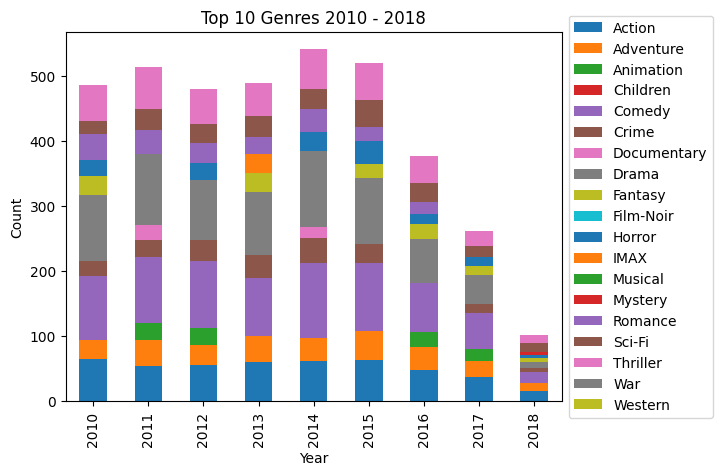

In [13]:
# Drop/Delete colum title
new_dataset_fix = new_dataset_fix.drop('mov_title', axis=1)

# Group by Year and Genres and count occurrences
genre_counts = new_dataset_fix.groupby(['mov_year', 'mov_genres']).size().reset_index(name='Count')

# Sort the genre counts within each year
genre_counts_sorted = genre_counts.groupby('mov_year').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)

# # Pivot the data to have Genres as columns and Year as rows
pivot_df = genre_counts_sorted.pivot(index='mov_year', columns='mov_genres', values='Count')

# Select the desired range of years
selected_years = pivot_df.loc['2010':'2018']

# Plot the histogram
ax = selected_years.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 10 Genres 2010 - 2018')

# Move the legend to the left
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate the x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [14]:
# Change Rename the 'mov_year' column to 'mov_title'
new_dataset_fix = new_dataset_fix.rename(columns={'mov_year': 'mov_title'})
new_dataset_fix['mov_title'] = dataset_movies_1['Title']
new_dataset_fix.head(5)

,mov_title,mov_genres
0,Toy Story,Adventure
1,Toy Story,Animation
2,Toy Story,Children
3,Toy Story,Comedy
4,Toy Story,Fantasy


In [15]:
# Delete unneeded character in title
new_dataset_fix['mov_title'] = new_dataset_fix['mov_title'].apply(lambda x: x.replace('.', '').replace("'", '').replace('"', '').replace('*', ''))

# Create a cross table
movie_cross_table = pd.crosstab(new_dataset_fix['mov_title'], new_dataset_fix['mov_genres'])
movie_cross_table.head(5)

mov_genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
mov_title,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
00 Schneider - Jagd auf Nihil Baxter,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1-900 (06),0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10 Cent Pistol,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


**Recommendation by Using Jaccard Similiarity**

<img src="https://user-images.githubusercontent.com/4745789/98462221-8dc3bd00-21d8-11eb-95bf-5a9267e88b97.png" width="700">

---

The Jaccard similarity index also called as the Jaccard similarity coefficient compares elements of two sets to figure out which members are common and which are distinct. It is a measure of commonality between two sets of data between 0 an 1. The higher the number, the more similar are the two sets.

Graph Example: https://media.geeksforgeeks.org/wp-content/uploads/20211223145401/Jaccard.jpg

---



In [16]:
# Import Jaccard similarity function
from sklearn.metrics import jaccard_score

# Import functions from scipy
from scipy.spatial.distance import pdist, squareform

# Calculate all pairwise distances
jaccard_distances = pdist(movie_cross_table.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

In [17]:
# Input Type
movie_name = input('Enter your movie preferences name: ')

# Find the values for the movie_name
jaccard_similarity_series = jaccard_similarity_df.loc[movie_name]

# Sort these values from highest to lowest
ordered_similarities_jaccard = jaccard_similarity_series.sort_values(ascending=False)
movie_names_jaccard = ordered_similarities_jaccard.index.tolist()

# Print the results
print('\nHere is some movies suggested for you:')
# print(ordered_similarities_jaccard[1:6])
print(', '.join(movie_names_jaccard[1:6]))

Enter your movie preferences name: Thor

Here is some movies suggested for you:
Harry Potter and the Deathly Hallows: Part 2, Harry Potter and the Order of the Phoenix, Wrath of the Titans, Harry Potter and the Deathly Hallows: Part 1, Beowulf & Grendel


**Recommendation by Using Cosine Similiarity**


---


Cosine similarity gives us the sense of cos angle between vectors. When vector are in same direction, cosine similarity is 1 while in case of perpendicular, it is 0. It is given by (1- cosine distance).


---




<img src="https://aitechtrend.com/wp-content/uploads/2023/02/Cosine-similarity.jpg" width="500">

In [18]:
# Import functions from scipy
from scipy.spatial.distance import cosine

# Calculate all pairwise distances
cosine_distances = pdist(movie_cross_table.values, metric='cosine')

# Convert the distances to a square matrix
cosine_similarity_array = 1 - squareform(cosine_distances)

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

In [19]:
# Input Type
movie_name = input('Enter your movie preferences name: ')

# Find the values for the movie_name
cosine_similarity_series = cosine_similarity_df.loc[movie_name]

# Sort these values from highest to lowest
ordered_similarities_cosine = cosine_similarity_series.sort_values(ascending=False)
movie_names_cosine = ordered_similarities_cosine.index.tolist()

# Print the results
print('\nHere is some movies suggested for you:')
# print(ordered_similarities_cosine[1:6])
print(', '.join(movie_names_cosine[1:6]))

Enter your movie preferences name: Thor

Here is some movies suggested for you:
Harry Potter and the Deathly Hallows: Part 2, Seeker: The Dark Is Rising, The, In the Name of the King III, Lord of the Rings: The Return of the King, The, Wrath of the Titans


### ***Collaborative Filtering***

This approach recommends items based on the preferences and behavior of similar users. It looks for patterns and similarities among users' interactions, such as ratings, purchases, or browsing history, to generate recommendations.

This type of filter is based on users’ rates, and it will recommend us movies that we haven’t watched yet, but users similar to us have, and like. To determine whether two users are similar or not, this filter considers the movies both of them watched and how they rated them. By looking at the items in common, this type of algorithm will basically predict the rate of a movie for a user who hasn’t watched it yet, based on the similar users’ rates.

In order to work accurately, this type of filter needs rates, and not all users rate products constantly. Some of them barely or never rate anything! Another characteristic of this method is the diversity in the recommendations, that can be good or bad, depending on the case. For example, let’s say user A likes dystopian movies and dark comedy a lot. User B also enjoys dystopian movies but never watched dark comedy. The collaborative filter will recommend dark comedy shows to user B, based on the common taste that the two users have for dystopian movies. This scenario can go two ways: either user B finds out that he/she likes dark comedy a lot, and in that case, great, a lot of new things to watch on his/her list! Or, user B really enjoys a lighter comedy style, and in that case the recommendation has not been successful.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*x8gTiprhLs7zflmEn1UjAQ.png" width="500" align="left">




In [20]:
# Calling dataset
dataset_raw_user_ratings = pd.read_csv('/content/drive/MyDrive/user_ratings.csv')
dataset_raw_user_ratings.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [21]:
# Drop/Delete unnecessary column title
dataset_raw_user_ratings = dataset_raw_user_ratings.drop('movieId', axis=1)
dataset_raw_user_ratings = dataset_raw_user_ratings.drop('timestamp', axis=1)
dataset_raw_user_ratings = dataset_raw_user_ratings.drop('genres', axis=1)

# Remove the last 7 characters (years from title) from each subindex
updated_subindices = [subindex[:-7] for subindex in dataset_raw_user_ratings.title]

# Add "user_" to each element in the list
updated_numbers = ['user_{:03d}'.format(number) for number in dataset_raw_user_ratings.userId]

# Updated dataset
dataset_raw_user_ratings['userId'] = updated_numbers
dataset_raw_user_ratings['title'] = updated_subindices

dataset_raw_user_ratings.head(5)

,userId,rating,title
0,user_001,4.0,Toy Story
1,user_005,4.0,Toy Story
2,user_007,4.5,Toy Story
3,user_015,2.5,Toy Story
4,user_017,4.5,Toy Story


In [22]:
# Check for blanks & empty in the 'title' column and count the occurrences
blank_count = dataset_raw_user_ratings['title'].isnull().sum() + (dataset_raw_user_ratings['title'] == '').sum()

print(f"Number of blank values in the 'title' column: {blank_count}")

Number of blank values in the 'title' column: 3


In [23]:
# Delete rows where the 'title' column is empty
dataset_raw_user_ratings = dataset_raw_user_ratings[dataset_raw_user_ratings['title'] != '']
dataset_raw_user_ratings.head(5)

,userId,rating,title
0,user_001,4.0,Toy Story
1,user_005,4.0,Toy Story
2,user_007,4.5,Toy Story
3,user_015,2.5,Toy Story
4,user_017,4.5,Toy Story


In [24]:
# Delete unneeded character in title
dataset_raw_user_ratings['title'] = dataset_raw_user_ratings['title'].apply(lambda x: x.replace('.', '').replace("'", '').replace('"', '').replace('*', ''))

# Create the cross table
movie_pivot_table = dataset_raw_user_ratings.pivot_table(values='rating', index='userId', columns='title')
movie_pivot_table.head(5)

title,(500) Days of Summer,00 Schneider - Jagd auf Nihil Baxter,1-900 (06),10,10 Cent Pistol,10 Cloverfield Lane,10 Items or Less,10 Things I Hate About You,10 Years,"10,000 BC",...,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,batteries not included,"burbs, The",eXistenZ,night Mother,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
user_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
user_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Get the average rating for each user
avg_ratings_collaborative = movie_pivot_table.mean(axis=1)

# Center each users ratings around 0
user_ratings_collaborative_centered = movie_pivot_table.sub(avg_ratings_collaborative, axis=0)

# Fill in the missing data with 0s
user_ratings_collaborative_normed = user_ratings_collaborative_centered.fillna(0)

# Transpose the pivot table using .T attribute
user_ratings_collaborative_normed_transposed = user_ratings_collaborative_normed.T
user_ratings_collaborative_normed_transposed.head(5)

userId,user_001,user_002,user_003,user_004,user_005,user_006,user_007,user_008,user_009,user_010,...,user_601,user_602,user_603,user_604,user_605,user_606,user_607,user_608,user_609,user_610
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.187211
00 Schneider - Jagd auf Nihil Baxter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1-900 (06),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10 Cent Pistol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


**Recommendation by Using Cosine Similiarity**



In [26]:
# Instead using scipy we are using sklearn cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Assign the arrays to variables
movie_1 = user_ratings_collaborative_normed_transposed.loc['Toy Story', :].values.reshape(1, -1)
movie_2 = user_ratings_collaborative_normed_transposed.loc['Toy Story 2', :].values.reshape(1, -1)

# Find the similarity between two Star Wars movies
similarity_result = cosine_similarity(movie_1, movie_2)
print(similarity_result)

[[0.40320802]]


In [27]:
# Generate the similarity matrix
similarities = cosine_similarity(user_ratings_collaborative_normed_transposed)

# Wrap the similarities in a DataFrame
cosine_similarity_collaborative = pd.DataFrame(similarities, index=user_ratings_collaborative_normed_transposed.index, columns=user_ratings_collaborative_normed_transposed.index)


In [28]:
# Input Type
movie_name = input('Enter your movie preferences name: ')

# Find the values for the movie_name
cosine_similarity_series_collaborative = cosine_similarity_collaborative.loc[movie_name]

# Sort these values from highest to lowest
ordered_similarities_cosine_collaborative = cosine_similarity_series_collaborative.sort_values(ascending=False)
movie_names_cosine_collaborative = ordered_similarities_cosine_collaborative.index.tolist()

# Print the results
print('\nHere is some movies suggested for you:')
# print(ordered_similarities_cosine_collaborative[1:6])
print(', '.join(movie_names_cosine_collaborative[1:6]))

Enter your movie preferences name: Thor

Here is some movies suggested for you:
Thor: The Dark World, Captain America: The First Avenger, Avengers: Age of Ultron, Batman: Gotham Knight, Wild China


**Recommendation by Using KNN Nearest Neighbors**

<img src="https://miro.medium.com/v2/resize:fit:1000/0*vsIBXs82nK1ER-Fy.png" width="600" margin="20em">

K-nearest neighbors (KNN) is a machine learning algorithm used for both classification and regression tasks. It is a non-parametric method that makes predictions based on the k nearest data points in the training dataset.


<img src="https://datascientest.com/de/wp-content/uploads/sites/8/2020/11/Illu-2-KNN-2048x983.jpg.webp" width="800" margin="20em">

In KNN, the number of neighbors (k) is a hyperparameter that needs to be specified. When making predictions, KNN finds the k nearest neighbors to the input data point and assigns a class or value based on the majority or average of the neighbors' classes or values.

Choosing the best value of k in K-nearest neighbors (KNN) is a common challenge in practice. The selection of the optimal k value depends on the dataset and the problem you are trying to solve. Here are a few approaches to consider:

1.   Cross-validation: Split your dataset into training and validation sets. Train the KNN model with different values of k on the training set and evaluate their performance on the validation set. Choose the value of k that gives the best performance metrics (e.g., accuracy, precision, recall, etc.) on the validation set.
2.   Grid search: Define a range of k values to explore, such as [1, 3, 5, 7, 9]. Use a grid search algorithm to systematically evaluate each value of k using cross-validation. The grid search will find the best k value based on the specified performance metric.
3.   Domain knowledge: Depending on the problem domain, you may have prior knowledge or expectations about the suitable range of k values. For example, if you know that the underlying structure of the data is complex, a larger value of k may be appropriate. Conversely, if the data is simple, a smaller value of k might suffice.

<img src="https://1515790077-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-M38GvQhkQdW5qUuSr7t%2F-M5TVEzRdIdn4FzsZg-N%2F-M5TVq11P4DVAk-LQIio%2Fimage.png?alt=media&token=ebd2bcd8-3296-4a5b-885f-26f5ff5b640a" width="600" margin="20em">

Estimating underfitting and overfitting is crucial in machine learning because it helps us understand how well our models are performing and whether they are capturing the underlying patterns in the data effectively. Overfitting occurs when a model performs well on the training data but poorly on unseen or new data. It happens when the model captures the noise or random fluctuations in the training data instead of learning the underlying patterns. Overfitting usually occurs when the model is too complex or has too many parameters relative to the amount of available training data. Underfitting, on the other hand, occurs when a model is too simple to capture the underlying patterns in the data. It results in poor performance on both the training and unseen data. Underfitting can happen when the model is too basic or lacks the necessary complexity to capture the relationships between the features and the target variable.








**Mini Example :**

In [29]:
# Calling dataset
dataset_raw_used_app = pd.read_csv('/content/drive/MyDrive/app_knn.csv', sep=";")
dataset_raw_used_app.head(5)

,Age,Income,Spending,App
0,19,15,39,TikTok
1,21,15,81,TikTok
2,20,16,6,TikTok
3,23,16,77,Youtube
4,31,17,40,Instagram


In [30]:
from sklearn.neighbors import KNeighborsClassifier

Features = ['Age', 'Income', 'Spending']
x = dataset_raw_used_app[Features].copy()
y = dataset_raw_used_app['App']

knn_app = KNeighborsClassifier(n_neighbors=3)
knn_app.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Calling dataset
dataset_raw_used_app_new = pd.read_csv('/content/drive/MyDrive/new_app_knn.csv', sep=";")
dataset_raw_used_app_new.head(5)

,Age,Income,Spending,App
0,25,72,34,Youtube
1,58,20,15,Facebook
2,21,30,73,Tiktok
3,33,42,60,Youtube
4,36,87,92,Youtube


In [32]:
knn_app.predict(dataset_raw_used_app_new[Features])

array(['TikTok', 'TikTok', 'Instagram', 'Instagram', 'Instagram'],
      dtype=object)

In [33]:
dataset_raw_used_app_new['Pred_App'] = knn_app.predict(dataset_raw_used_app_new[Features])
dataset_raw_used_app_new

,Age,Income,Spending,App,Pred_App
0,25,72,34,Youtube,TikTok
1,58,20,15,Facebook,TikTok
2,21,30,73,Tiktok,Instagram
3,33,42,60,Youtube,Instagram
4,36,87,92,Youtube,Instagram


**Back To Movie Case :**

In [38]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

array_movie_knn = user_ratings_collaborative_normed_transposed.values

matrix_123 = csr_matrix(array_movie_knn)

model_knn = NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model_knn.fit(matrix_123)

NearestNeighbors(algorithm='brute', metric='cosine')

In [45]:
# Input Type
movie_name_knn = input('Enter your movie preferences name: ')

distances, indices = model_knn.kneighbors(user_ratings_collaborative_normed_transposed.loc[movie_name_knn, :].values.reshape(1, -1), n_neighbors = 5)

# Print the distances and indices of the nearest neighbors
print("Distances:", distances)
print("Indices:", indices)

Enter your movie preferences name: Thor
Distances: [[2.22044605e-16 3.38679689e-01 5.19123188e-01 5.26187207e-01
  5.72837968e-01]]
Indices: [[8448 8450 1503  663  814]]


In [46]:
nearest_movie_indices = indices.flatten()  # Flatten the indices array

# Retrieve the names of the nearest neighbors
nearest_movie_names = [user_ratings_collaborative_normed_transposed.index[i] for i in nearest_movie_indices]

# Print the names of the nearest neighbors
print("Nearest Movie Names:")
for movie_name in nearest_movie_names[1:6]:
    print(movie_name)

Nearest Movie Names:
Thor: The Dark World
Captain America: The First Avenger
Avengers: Age of Ultron
Batman: Gotham Knight


**Matrix sparsity**


A common challenge with real-world ratings data is that most users will not have rated most items, and most items will only have been rated by a small number of users. This results in a very empty or sparse DataFrame.

In [47]:
# Create the cross table
movie_pivot_table_original = dataset_raw_user_ratings.pivot_table(values='rating', index='userId', columns='title')
movie_pivot_table_original.head(5)

title,(500) Days of Summer,00 Schneider - Jagd auf Nihil Baxter,1-900 (06),10,10 Cent Pistol,10 Cloverfield Lane,10 Items or Less,10 Things I Hate About You,10 Years,"10,000 BC",...,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,batteries not included,"burbs, The",eXistenZ,night Mother,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
user_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
user_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Count the occupied cells
sparsity_count = movie_pivot_table_original.isnull().values.sum()

# Count all cells
full_count = movie_pivot_table_original.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

0.9825586825526064


In [49]:
# Count the occupied cells per column
occupied_count = movie_pivot_table_original.notnull().sum()
print(occupied_count)

title
(500) Days of Summer                    42
00 Schneider - Jagd auf Nihil Baxter     1
1-900 (06)                               1
10                                       4
10 Cent Pistol                           2
                                        ..
night Mother                             1
xXx                                     24
xXx: State of the Union                  5
¡Three Amigos!                          26
À nous la liberté (Freedom for Us)       1
Length: 9443, dtype: int64


In [64]:
# Get the average rating for each user
avg_ratings_1 = movie_pivot_table_original.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered_1 = movie_pivot_table_original.sub(avg_ratings, axis=0)

# Fill in all missing values with 0s
user_ratings_centered_1.fillna(0, inplace=True)
user_ratings_centered_1.head()


title,(500) Days of Summer,00 Schneider - Jagd auf Nihil Baxter,1-900 (06),10,10 Cent Pistol,10 Cloverfield Lane,10 Items or Less,10 Things I Hate About You,10 Years,"10,000 BC",...,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,batteries not included,"burbs, The",eXistenZ,night Mother,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
user_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.373362,0.0
user_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
user_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
user_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
user_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [65]:
# Import the required libraries
import scipy.sparse
from scipy.sparse.linalg import svds

user_item_matrix = scipy.sparse.csr_matrix(user_ratings_centered_1)

# Decompose the matrix
U, sigma, Vt = svds(user_item_matrix)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)

In [66]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings_1.values.reshape(-1, 1)

# Create DataFrame of the results
movie_pivot_table_predicted = pd.DataFrame(uncentered_ratings,
                                    index=user_ratings_centered_1.index,
                                    columns=user_ratings_centered_1.columns
                                   )
movie_pivot_table_predicted.head()

title,(500) Days of Summer,00 Schneider - Jagd auf Nihil Baxter,1-900 (06),10,10 Cent Pistol,10 Cloverfield Lane,10 Items or Less,10 Things I Hate About You,10 Years,"10,000 BC",...,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,batteries not included,"burbs, The",eXistenZ,night Mother,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
user_001,4.404319,4.374933,4.373428,4.375354,4.372535,4.374126,4.372923,4.364860,4.375807,4.338063,...,4.373866,4.373343,4.373135,4.365274,4.395614,4.371483,4.345429,4.366636,4.351547,4.373797
user_002,3.945100,3.948208,3.948284,3.949004,3.947078,3.948223,3.948369,3.948030,3.948951,3.952094,...,3.947253,3.948247,3.948511,3.949585,3.945950,3.948594,3.945722,3.946362,3.950968,3.948156
user_003,2.421541,2.435162,2.435886,2.435227,2.436720,2.436827,2.436391,2.442770,2.435065,2.438128,...,2.431873,2.435776,2.439242,2.442983,2.428080,2.438627,2.437285,2.430929,2.442076,2.435371
user_004,3.527783,3.556426,3.555719,3.569150,3.542409,3.544012,3.554372,3.523036,3.569654,3.559024,...,3.566690,3.555793,3.543833,3.491435,3.588391,3.545391,3.541381,3.580657,3.533025,3.557310
user_005,3.638776,3.637035,3.636366,3.636726,3.638080,3.635714,3.636042,3.623799,3.636979,3.633775,...,3.638998,3.636449,3.635560,3.631835,3.645594,3.634980,3.635985,3.638705,3.627574,3.637005


**Matrix sparsity & Cosine Similiarity**

In [67]:
# Transposed Pivot Table
transposed_table = movie_pivot_table_predicted.transpose()
transposed_table.head()

userId,user_001,user_002,user_003,user_004,user_005,user_006,user_007,user_008,user_009,user_010,...,user_601,user_602,user_603,user_604,user_605,user_606,user_607,user_608,user_609,user_610
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,4.404319,3.945100,2.421541,3.527783,3.638776,3.558347,3.275085,3.594555,3.271497,3.293443,...,4.439972,3.451192,2.903008,3.487917,3.252385,3.676790,3.819659,3.372699,3.280007,3.745504
00 Schneider - Jagd auf Nihil Baxter,4.374933,3.948208,2.435162,3.556426,3.637035,3.493485,3.234555,3.575481,3.261438,3.277418,...,4.426574,3.394508,3.516322,3.480931,3.211916,3.665155,3.786999,3.134572,3.270704,3.693408
1-900 (06),4.373428,3.948284,2.435886,3.555719,3.636366,3.493788,3.232183,3.574521,3.261006,3.278598,...,4.425765,3.392759,3.510246,3.480036,3.211451,3.656884,3.786086,3.131171,3.270274,3.687939
10,4.375354,3.949004,2.435227,3.569150,3.636726,3.494659,3.247435,3.570377,3.267021,3.278960,...,4.422728,3.391684,3.548948,3.480077,3.219871,3.648929,3.782077,3.054651,3.269301,3.726480
10 Cent Pistol,4.372535,3.947078,2.436720,3.542409,3.638080,3.477922,3.204492,3.580294,3.250751,3.270366,...,4.430077,3.388948,3.589780,3.481165,3.189464,3.695362,3.790277,3.191549,3.271501,3.636875


In [68]:
# Import functions from scipy
from scipy.spatial.distance import cosine

# Calculate all pairwise distances
cosine_distances_matrix = pdist(transposed_table.values, metric='cosine')

# Convert the distances to a square matrix
cosine_similarity_array_matrix = 1 - squareform(cosine_distances_matrix)

# Wrap the array in a pandas DataFrame
cosine_similarity_df_matrix = pd.DataFrame(cosine_similarity_array_matrix, index=transposed_table.index, columns=transposed_table.index)

In [69]:
# Input Type
movie_name_matrix = input('Enter your movie preferences name: ')

# Find the values for the movie_name
cosine_similarity_series_matrix = cosine_similarity_df_matrix.loc[movie_name_matrix]

# Sort these values from highest to lowest
ordered_similarities_cosine_matrix = cosine_similarity_series_matrix.sort_values(ascending=False)
movie_names_cosine_matrix = ordered_similarities_cosine_matrix.index.tolist()

# Print the results
print('\nHere is some movies suggested for you:')
# print(ordered_similarities_cosine_matrix[1:6])
print(', '.join(movie_names_cosine_matrix[1:6]))

Enter your movie preferences name: Thor

Here is some movies suggested for you:
Mo Better Blues, Spy Game, Tommy Boy, Fallen, Jiro Dreams of Sushi


**Validation Measurement**

In [70]:
from sklearn.metrics import mean_squared_error

# Extract the ground truth to compare your predictions against
actual_values = movie_pivot_table_original.values
predicted_values = movie_pivot_table_predicted.values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))

0.8366188264730886


In [71]:
row_user_actual = movie_pivot_table_original.loc['user_055'].dropna()
row_user_actual.head(10)

title
Boondock Saints, The     5.0
Bourne Ultimatum, The    4.0
Cocoon                   3.0
Crash                    4.5
Departed, The            5.0
Fatal Attraction         1.0
Gandhi                   4.0
Go                       2.5
Goonies, The             2.0
Highlander               4.0
Name: user_055, dtype: float64

In [72]:
row_user_predicted = movie_pivot_table_predicted.loc['user_055'].loc['Gandhi']
row_user_predicted

2.839488162045538

### ***Knowledge-Based Filtering***

A knowledge-based recommendation system is a type of recommendation system that suggests items or information based on predefined knowledge or rules. It relies on explicit knowledge about the items and the user's preferences to make recommendations. Unlike other recommendation systems that use user behavior or collaborative filtering techniques, a knowledge-based recommendation system does not require historical data or user interactions.

<img src="https://www.researchgate.net/profile/Alexander-Felfernig/publication/256458336/figure/fig3/AS:297842708107265@1448022643077/Knowledge-based-recommendation-KBR-dataflow-users-are-entering-their-preferences-and.png" width="600">

> **Example**



Let's say you have a movie recommendation system based on user preferences and movie genres. The system has explicit knowledge about the movie genres and user preferences. Here's how it can make recommendations:

1.   User Profile: The system maintains a user profile that includes information about the user's preferred movie genres. For example, a user profile may indicate that the user likes action, adventure, and comedy genres.
2.   Movie Knowledge Base: The system has a knowledge base that contains information about each movie, including its title, description, and associated genres. For example, the knowledge base may include movies like "The Avengers" (action, adventure), "Jurassic Park" (action, adventure, sci-fi), and "Deadpool" (action, comedy).
3.   Recommendation Process: When a user requests movie recommendations, the system uses the user profile and the movie knowledge base to generate personalized recommendations. It applies rules or algorithms based on the user's preferred genres.
 *   For example, if the user profile indicates a preference for action and adventure genres, the system may recommend movies like "The Avengers" and "Jurassic Park" from the knowledge base.
 *  If the user profile also indicates a preference for comedy, the system may further refine the recommendations and suggest movies like "Deadpool" that match the user's preferred genres.
 *  The system can also apply additional rules, such as excluding movies that the user has already watched or considering other factors like movie ratings or release dates.

In this example, the knowledge-based recommendation system makes recommendations based on the explicit knowledge it has about movie genres and the user's preferences. It doesn't require any historical data or user interactions but relies on predefined rules or algorithms to generate personalized recommendations.

In [73]:
columns_list = movie_pivot_table_original.columns.tolist()

print(columns_list)

['(500) Days of Summer', '00 Schneider - Jagd auf Nihil Baxter', '1-900 (06)', '10', '10 Cent Pistol', '10 Cloverfield Lane', '10 Items or Less', '10 Things I Hate About You', '10 Years', '10,000 BC', '100 Girls', '100 Streets', '101 Dalmatians', '101 Dalmatians (One Hundred and One Dalmatians)', '101 Dalmatians II: Patchs London Adventure', '101 Reykjavik (101 Reykjavík)', '102 Dalmatians', '10th & Wolf', '10th Kingdom, The', '10th Victim, The (La decima vittima)', '110901 - September 11', '11:14', '11th Hour, The', '12 Angry Men', '12 Chairs', '12 Rounds', '12 Years a Slave', '127 Hours', '13 Assassins (Jûsan-nin no shikaku)', '13 Ghosts', '13 Going on 30', '13 Hours', '13 Sins', '13 Tzameti', '13th', '13th Warrior, The', '1408', '1492: Conquest of Paradise', '15 Minutes', '16 Blocks', '17 Again', '1776', '18 Again!', '187 (One Eight Seven)', '1900 (Novecento)', '1941', '1969', '1984 (Nineteen Eighty-Four)', '2 Days in New York', '2 Days in Paris', '2 Days in the Valley', '2 Fast 2 F

In [75]:
# Input Type
movie_name_knowledge_base = input('Enter your movie preferences name: ')

# Find similar items
similar_items = []
for movie in columns_list:
    if re.search(r'\b{}\b'.format(movie_name_knowledge_base), movie, flags=re.IGNORECASE):
        similar_items.append(movie)

# Generate recommendations
recommendations = []
for item in similar_items:
    recommendations.append(item)

# Store the recommendations in a list
recommended_movies = []
for movie in recommendations:
    recommended_movies.append(movie)

# Print the recommendations
print('Recommended Movies:')
for movie in recommended_movies[1:]:
    print(movie)

Enter your movie preferences name: Thor
Recommended Movies:
Thor: Ragnarok
Thor: The Dark World
While You Were Fighting: A Thor Mockumentary


In [76]:
# Get the recommendations as a result
result_recommendations_knowledge_base = recommended_movies[1:]
print(result_recommendations_knowledge_base)

['Thor: Ragnarok', 'Thor: The Dark World', 'While You Were Fighting: A Thor Mockumentary']


### ***Hybird Filtering***

These approaches combine collaborative filtering and content-based filtering techniques to leverage the strengths of both methods and provide more accurate and diverse recommendations.

<img src="https://www.researchgate.net/profile/Gabriele-Sottocornola/publication/319045879/figure/fig1/AS:530613683273728@1503519568040/Hybrid-recommendation-model.png" width="600" align="left">

In [87]:
filtered_index = set(user_ratings_collaborative_normed_transposed.index).difference(result_recommendations_knowledge_base)
filtered_movie_pivot_table_normed = user_ratings_collaborative_normed_transposed.loc[filtered_index]

array_movie_knn_hybird = filtered_movie_pivot_table_normed.values

matrix_12345 = csr_matrix(array_movie_knn_hybird)

model_knn_hybird= NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model_knn_hybird.fit(matrix_12345)

<ipython-input-87-44a105f8f3a5>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  filtered_movie_pivot_table_normed = user_ratings_collaborative_normed_transposed.loc[filtered_index]


NearestNeighbors(algorithm='brute', metric='cosine')

In [89]:
distances_hybird, indices_hybird = model_knn_hybird.kneighbors(user_ratings_collaborative_normed_transposed.loc[movie_name_knowledge_base, :].values.reshape(1, -1), n_neighbors = 10)

# Print the distances and indices of the nearest neighbors
print("Distances:", distances_hybird)
print("Indices:", indices_hybird)

Distances: [[2.22044605e-16 5.19123188e-01 5.26187207e-01 5.72837968e-01
  5.77028908e-01 5.77028908e-01 5.77028908e-01 5.77028908e-01
  5.77562986e-01 5.99029612e-01]]
Indices: [[ 552 7089 1768 3075  539 1692  436 2717  867 3105]]


In [91]:
nearest_movie_indices_hybird = indices.flatten()  # Flatten the indices array

# Retrieve the names of the nearest neighbors
nearest_movie_names_hybird = [user_ratings_collaborative_normed_transposed.index[i] for i in nearest_movie_indices]

# Filter out the movies to be excluded
filtered_nearest_movies = [movie for movie in nearest_movie_names_hybird if movie not in result_recommendations_knowledge_base]

# Print the names of the nearest neighbors
print("Nearest Movie Names:")
for movie in recommended_movies[1:]:
    print(movie)
for movie_name in filtered_nearest_movies[1:6]:
    print(movie_name)

Nearest Movie Names:
Thor: Ragnarok
Thor: The Dark World
While You Were Fighting: A Thor Mockumentary
Captain America: The First Avenger
Avengers: Age of Ultron
Batman: Gotham Knight
